### Análise de desempenho
#### Nas células abaixo, o desempenho de cada algoritmo de reposição de páginas vai ser analisado da seguinte forma: para cada um dos tamanhos da memória principal 256 KB, 1024 KB, 4096 KB e 16384 KB, os arquivos de teste compilador.log, compressor.log, simulador.log e matriz.log serão avaliados em relação ao número de escritas e leituras na memória secundária.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
testOutput = pd.read_csv("./test/testOutput.csv")
testOutput

,input_path,virtual_memory_size,main_memory_size,page_size,replacement_algorithm,secondary_memory_reads,secondary_memory_writes
0,./mocks/compilador.log,4194304,256,4,lru,59089,8863
1,./mocks/compilador.log,4194304,256,4,2a,57051,7808
2,./mocks/compilador.log,4194304,256,4,random,75313,12324
3,./mocks/compilador.log,4194304,256,4,fifo,70315,12053
4,./mocks/compilador.log,4194304,256,16,lru,102959,14033
...,...,...,...,...,...,...,...
187,./mocks/matriz.log,4194304,16384,16,fifo,2294,633
188,./mocks/matriz.log,4194304,16384,64,lru,2331,781
189,./mocks/matriz.log,4194304,16384,64,2a,2438,824
190,./mocks/matriz.log,4194304,16384,64,random,3567,1278


##### Tamanho da memória principal: 256 KB
##### Eixo x: tamanho da página -> [4 KB, 16 KB, 64 KB]
##### Eixo y à esquerda: número de leituras à memória secundária (page faults)
##### Eixo y à direita: número de escritas à memória secundária

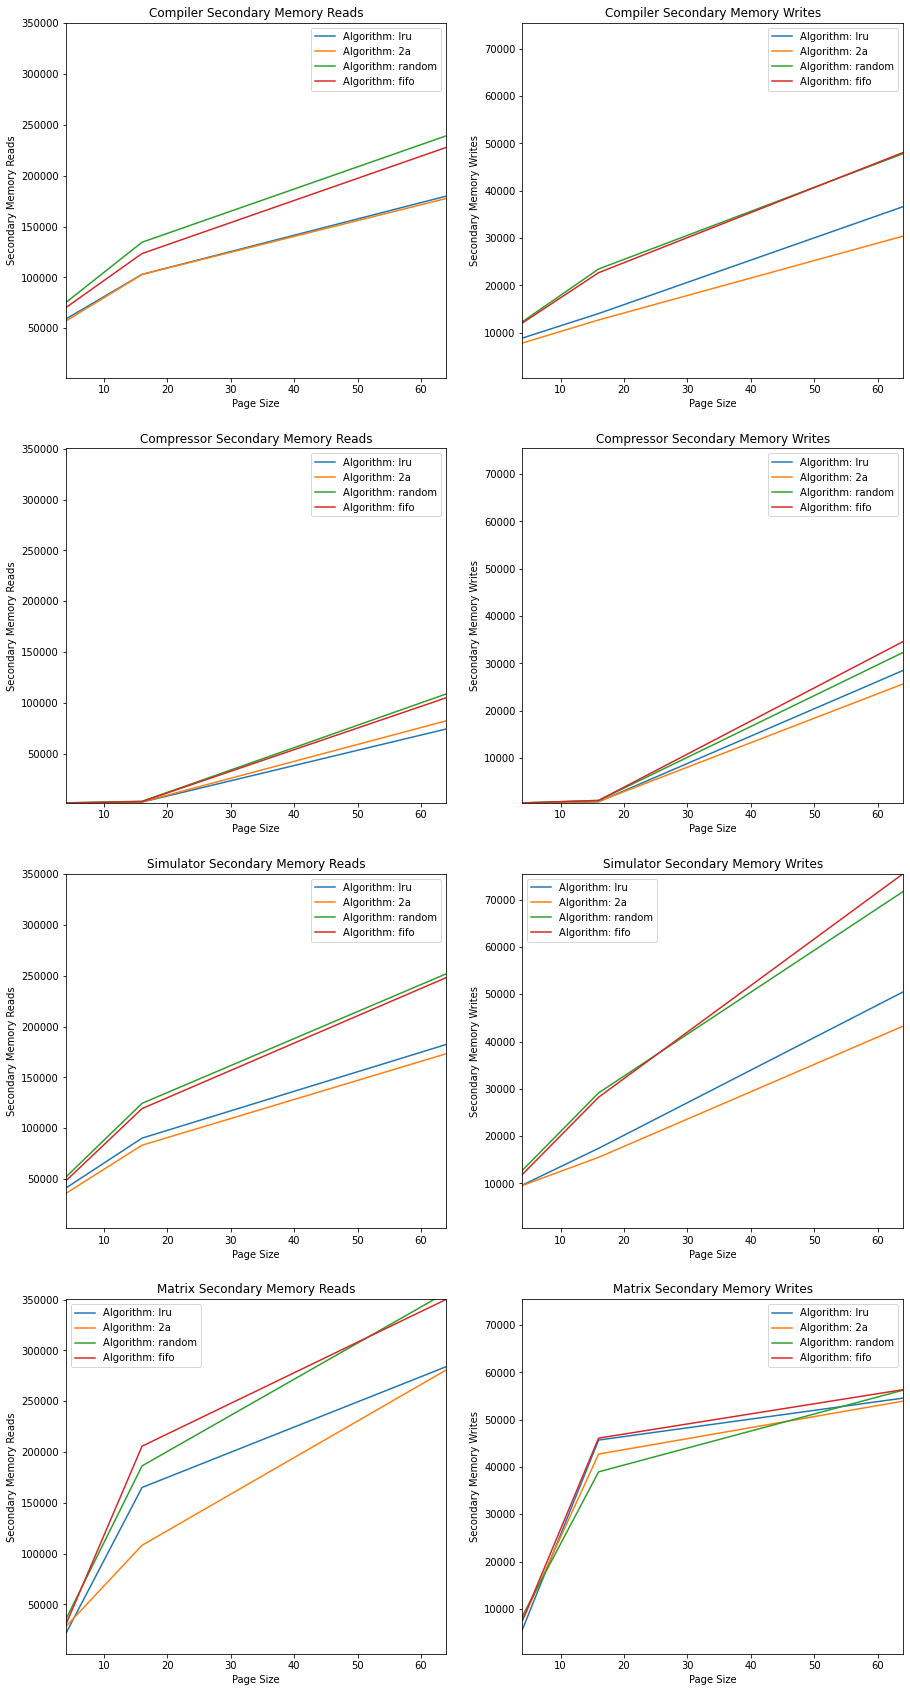

In [35]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

mainMemorySize = 256

testOutputMemory = testOutput.loc[testOutput["main_memory_size"] == mainMemorySize]
    
for algorithm in testOutputMemory["replacement_algorithm"].unique():
    
    xRange = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "page_size"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "page_size"].max()]
    yRangeR = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_reads"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_reads"].max()]
    yRangeW = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_writes"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_writes"].max()]

    compilerOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("compilador"))]

    ax[0][0].plot(
        compilerOutputAlg["page_size"], 
        compilerOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[0][0].legend()
    ax[0][0].set(title="Compiler Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[0][1].plot(
        compilerOutputAlg["page_size"], 
        compilerOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[0][1].legend()
    ax[0][1].set(title="Compiler Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    compressorOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("compressor"))]

    ax[1][0].plot(
        compressorOutputAlg["page_size"], 
        compressorOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[1][0].legend()
    ax[1][0].set(title="Compressor Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[1][1].plot(
        compressorOutputAlg["page_size"], 
        compressorOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[1][1].legend()
    ax[1][1].set(title="Compressor Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    simulatorOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("simulador"))]

    ax[2][0].plot(
        simulatorOutputAlg["page_size"], 
        simulatorOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[2][0].legend()
    ax[2][0].set(title="Simulator Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[2][1].plot(
        simulatorOutputAlg["page_size"], 
        simulatorOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[2][1].legend()
    ax[2][1].set(title="Simulator Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    matrixOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("matriz"))]

    ax[3][0].plot(
        matrixOutputAlg["page_size"], 
        matrixOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[3][0].legend()
    ax[3][0].set(title="Matrix Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[3][1].plot(
        matrixOutputAlg["page_size"], 
        matrixOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[3][1].legend()
    ax[3][1].set(title="Matrix Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

##### Tamanho da memória principal: 1024 KB
##### Eixo x: tamanho da página -> [4 KB, 16 KB, 64 KB]
##### Eixo y à esquerda: número de leituras à memória secundária (page faults)
##### Eixo y à direita: número de escritas à memória secundária

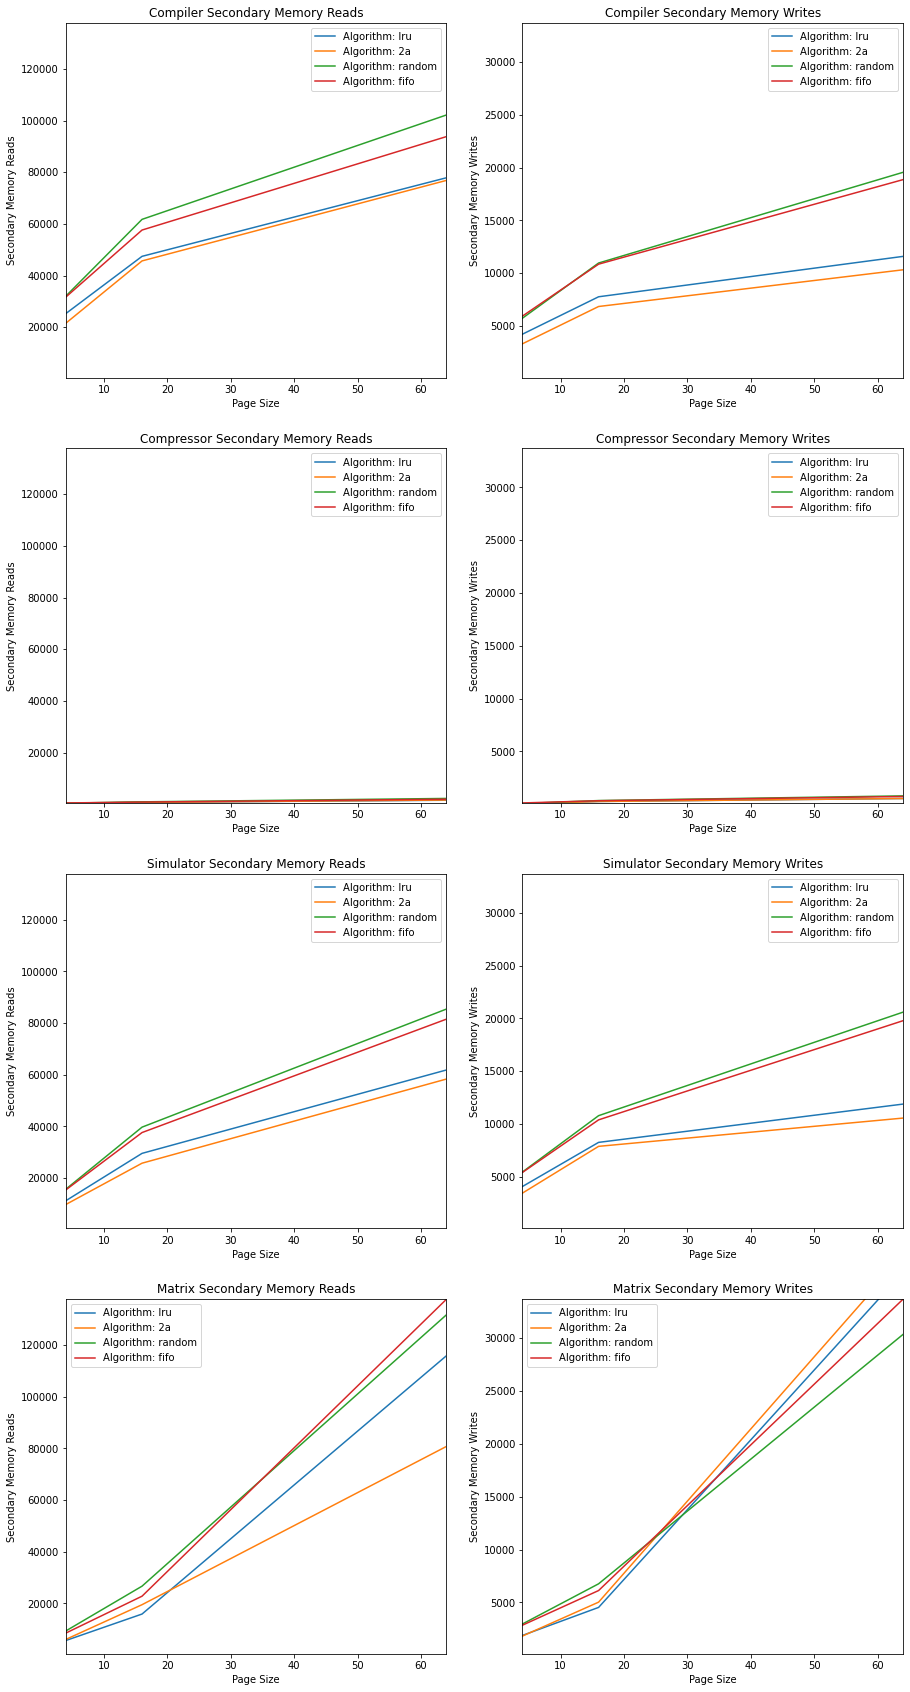

In [36]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

mainMemorySize = 1024

testOutputMemory = testOutput.loc[testOutput["main_memory_size"] == mainMemorySize]
    
for algorithm in testOutputMemory["replacement_algorithm"].unique():
    
    xRange = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "page_size"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "page_size"].max()]
    yRangeR = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_reads"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_reads"].max()]
    yRangeW = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_writes"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_writes"].max()]

    compilerOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("compilador"))]

    ax[0][0].plot(
        compilerOutputAlg["page_size"], 
        compilerOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[0][0].legend()
    ax[0][0].set(title="Compiler Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[0][1].plot(
        compilerOutputAlg["page_size"], 
        compilerOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[0][1].legend()
    ax[0][1].set(title="Compiler Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    compressorOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("compressor"))]

    ax[1][0].plot(
        compressorOutputAlg["page_size"], 
        compressorOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[1][0].legend()
    ax[1][0].set(title="Compressor Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[1][1].plot(
        compressorOutputAlg["page_size"], 
        compressorOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[1][1].legend()
    ax[1][1].set(title="Compressor Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    simulatorOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("simulador"))]

    ax[2][0].plot(
        simulatorOutputAlg["page_size"], 
        simulatorOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[2][0].legend()
    ax[2][0].set(title="Simulator Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[2][1].plot(
        simulatorOutputAlg["page_size"], 
        simulatorOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[2][1].legend()
    ax[2][1].set(title="Simulator Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    matrixOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("matriz"))]

    ax[3][0].plot(
        matrixOutputAlg["page_size"], 
        matrixOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[3][0].legend()
    ax[3][0].set(title="Matrix Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[3][1].plot(
        matrixOutputAlg["page_size"], 
        matrixOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[3][1].legend()
    ax[3][1].set(title="Matrix Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

##### Tamanho da memória principal: 4096 KB
##### Eixo x: tamanho da página -> [4 KB, 16 KB, 64 KB]
##### Eixo y à esquerda: número de leituras à memória secundária (page faults)
##### Eixo y à direita: número de escritas à memória secundária

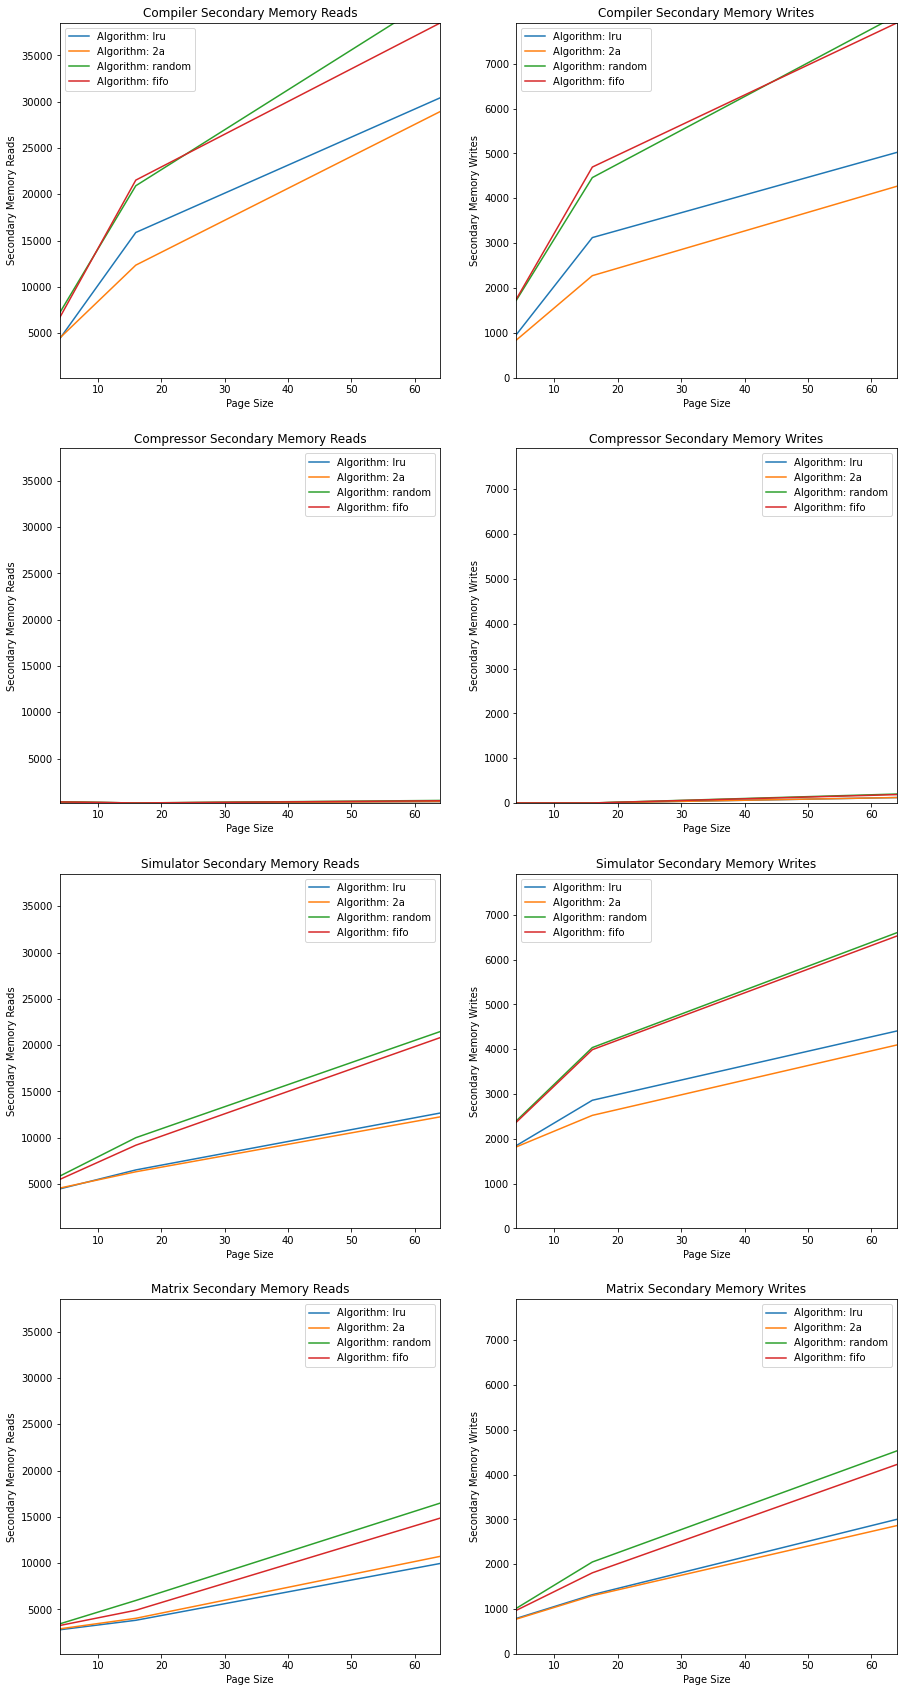

In [37]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

mainMemorySize = 4096

testOutputMemory = testOutput.loc[testOutput["main_memory_size"] == mainMemorySize]
    
for algorithm in testOutputMemory["replacement_algorithm"].unique():
    
    xRange = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "page_size"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "page_size"].max()]
    yRangeR = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_reads"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_reads"].max()]
    yRangeW = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_writes"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_writes"].max()]

    compilerOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("compilador"))]

    ax[0][0].plot(
        compilerOutputAlg["page_size"], 
        compilerOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[0][0].legend()
    ax[0][0].set(title="Compiler Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[0][1].plot(
        compilerOutputAlg["page_size"], 
        compilerOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[0][1].legend()
    ax[0][1].set(title="Compiler Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    compressorOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("compressor"))]

    ax[1][0].plot(
        compressorOutputAlg["page_size"], 
        compressorOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[1][0].legend()
    ax[1][0].set(title="Compressor Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[1][1].plot(
        compressorOutputAlg["page_size"], 
        compressorOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[1][1].legend()
    ax[1][1].set(title="Compressor Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    simulatorOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("simulador"))]

    ax[2][0].plot(
        simulatorOutputAlg["page_size"], 
        simulatorOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[2][0].legend()
    ax[2][0].set(title="Simulator Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[2][1].plot(
        simulatorOutputAlg["page_size"], 
        simulatorOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[2][1].legend()
    ax[2][1].set(title="Simulator Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    matrixOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("matriz"))]

    ax[3][0].plot(
        matrixOutputAlg["page_size"], 
        matrixOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[3][0].legend()
    ax[3][0].set(title="Matrix Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[3][1].plot(
        matrixOutputAlg["page_size"], 
        matrixOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[3][1].legend()
    ax[3][1].set(title="Matrix Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

##### Tamanho da memória principal: 16384 KB
##### Eixo x: tamanho da página -> [4 KB, 16 KB, 64 KB]
##### Eixo y à esquerda: número de leituras à memória secundária (page faults)
##### Eixo y à direita: número de escritas à memória secundária

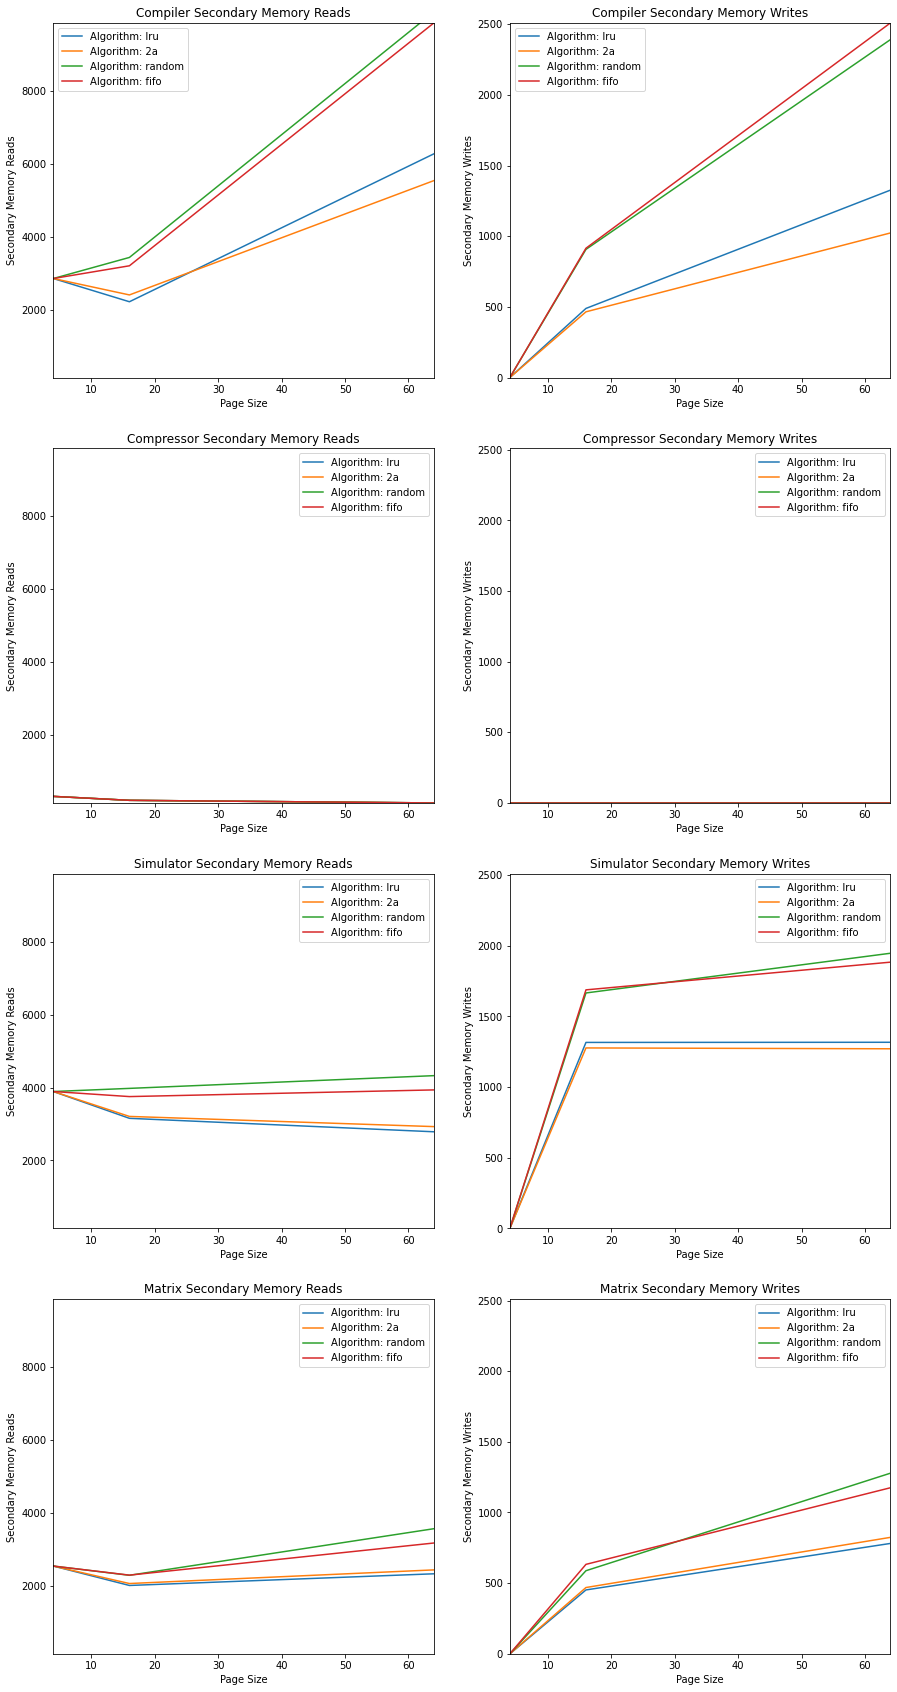

In [38]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

mainMemorySize = 16384

testOutputMemory = testOutput.loc[testOutput["main_memory_size"] == mainMemorySize]
    
for algorithm in testOutputMemory["replacement_algorithm"].unique():
    
    xRange = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "page_size"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "page_size"].max()]
    yRangeR = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_reads"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_reads"].max()]
    yRangeW = [testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_writes"].min(), testOutputMemory.loc[testOutputMemory["replacement_algorithm"] == algorithm, "secondary_memory_writes"].max()]

    compilerOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("compilador"))]

    ax[0][0].plot(
        compilerOutputAlg["page_size"], 
        compilerOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[0][0].legend()
    ax[0][0].set(title="Compiler Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[0][1].plot(
        compilerOutputAlg["page_size"], 
        compilerOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[0][1].legend()
    ax[0][1].set(title="Compiler Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    compressorOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("compressor"))]

    ax[1][0].plot(
        compressorOutputAlg["page_size"], 
        compressorOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[1][0].legend()
    ax[1][0].set(title="Compressor Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[1][1].plot(
        compressorOutputAlg["page_size"], 
        compressorOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[1][1].legend()
    ax[1][1].set(title="Compressor Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    simulatorOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("simulador"))]

    ax[2][0].plot(
        simulatorOutputAlg["page_size"], 
        simulatorOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[2][0].legend()
    ax[2][0].set(title="Simulator Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[2][1].plot(
        simulatorOutputAlg["page_size"], 
        simulatorOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[2][1].legend()
    ax[2][1].set(title="Simulator Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")

    matrixOutputAlg = testOutputMemory.loc[(testOutputMemory["replacement_algorithm"] == algorithm) & (testOutputMemory["input_path"].str.contains("matriz"))]

    ax[3][0].plot(
        matrixOutputAlg["page_size"], 
        matrixOutputAlg["secondary_memory_reads"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[3][0].legend()
    ax[3][0].set(title="Matrix Secondary Memory Reads", xlim=xRange, ylim=yRangeR, xlabel="Page Size", ylabel="Secondary Memory Reads")

    ax[3][1].plot(
        matrixOutputAlg["page_size"], 
        matrixOutputAlg["secondary_memory_writes"], 
        label=f"Algorithm: {algorithm}",
    )
    ax[3][1].legend()
    ax[3][1].set(title="Matrix Secondary Memory Writes", xlim=xRange, ylim=yRangeW, xlabel="Page Size", ylabel="Secondary Memory Writes")